In [1]:
import pandas as pd

In [2]:
diagnostics={"NORM":['NORM','CSD'],
             "STTC":['NDT', 'NST_', 'DIG', 'LNGQT', 'ISC_', 'ISCAL', 'ISCIN', 'ISCIL', 'ISCAS', 'ISCLA', 'ANEUR', 'EL', 'ISCAN' ],
             "MI":['IMI', 'ASMI', 'ILMI', 'AMI', 'ALMI', 'INJAS', 'LMI', 'INJAL', 'IPLMI', 'IPMI', 'INJIN', 'INJLA', 'PMI', 'INJIL'],
             "HYP":['LVH', 'LAO/LAE', 'RVH', 'RAO/RAE', 'SEHYP'],
             "CD":['LAFB', 'IRBBB', '1AVB', 'IVCD', 'CRBBB', 'CLBBB', 'LPFB', 'WPW', 'ILBBB', '3AVB', '2AVB'],
             "OTHER":['AFLT', 'AFIB', 'PSVT', 'STACH', 'PVC', 'PACE', 'PAC']
            }

In [3]:
db_path="../dataset/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3"
ecg_data=pd.read_csv(f'{db_path}/ptbxl_database.csv')
ecg_data

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21794,21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,...,True,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr
21795,21834,20703.0,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,...,True,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr
21796,21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,...,True,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr
21797,21836,8873.0,64.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-09 18:21:49,...,True,NaN,NaN,NaN,NaN,SVES,NaN,8,records100/21000/21836_lr,records500/21000/21836_hr


In [4]:
print(ecg_data)

       ecg_id  patient_id    age  sex  height  weight  nurse  site  \
0           1     15709.0   56.0    1     NaN    63.0    2.0   0.0   
1           2     13243.0   19.0    0     NaN    70.0    2.0   0.0   
2           3     20372.0   37.0    1     NaN    69.0    2.0   0.0   
3           4     17014.0   24.0    0     NaN    82.0    2.0   0.0   
4           5     17448.0   19.0    1     NaN    70.0    2.0   0.0   
...       ...         ...    ...  ...     ...     ...    ...   ...   
21794   21833     17180.0   67.0    1     NaN     NaN    1.0   2.0   
21795   21834     20703.0  300.0    0     NaN     NaN    1.0   2.0   
21796   21835     19311.0   59.0    1     NaN     NaN    1.0   2.0   
21797   21836      8873.0   64.0    1     NaN     NaN    1.0   2.0   
21798   21837     11744.0   68.0    0     NaN     NaN    1.0   2.0   

           device       recording_date  ... validated_by_human  \
0       CS-12   E  1984-11-09 09:17:34  ...               True   
1       CS-12   E  1984-11-

In [5]:
ecg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21799 entries, 0 to 21798
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ecg_id                        21799 non-null  int64  
 1   patient_id                    21799 non-null  float64
 2   age                           21799 non-null  float64
 3   sex                           21799 non-null  int64  
 4   height                        6974 non-null   float64
 5   weight                        9421 non-null   float64
 6   nurse                         20326 non-null  float64
 7   site                          21782 non-null  float64
 8   device                        21799 non-null  object 
 9   recording_date                21799 non-null  object 
 10  report                        21799 non-null  object 
 11  scp_codes                     21799 non-null  object 
 12  heart_axis                    13331 non-null  object 
 13  i

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,NORM,MI,STTC,CD,HYP
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,1,0,0,0,0
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,1,0,0,0,0
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,1,0,0,0,0
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,1,0,0,0,0
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,1,0,0,0,0


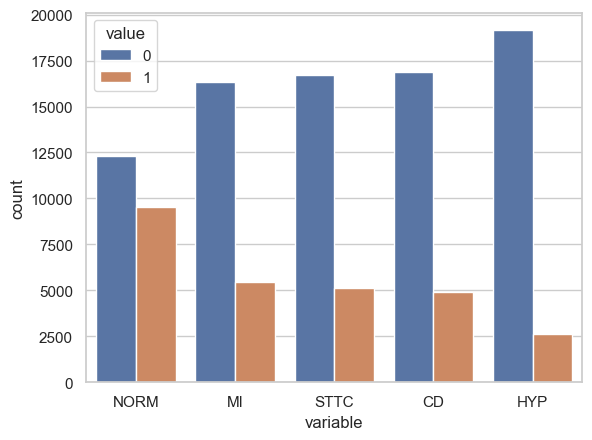

In [6]:
from ver5_journal.common.data.create_final_data import create_final_data

final_data = create_final_data()
final_data.head()

In [7]:
# 질병 관련 열 정의
disease_columns = ['MI', 'STTC', 'CD', 'HYP']

# NORM과 다른 질병이 동시에 나타나는 케이스 추출 및 개수 계산
co_occurrence_cases = final_data[(final_data['NORM'] == 1) & (final_data[disease_columns].sum(axis=1) > 0)]
co_occurrence_count = co_occurrence_cases.shape[0]

# 결과 출력
print(co_occurrence_count)
co_occurrence_cases

417


,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,NORM,MI,STTC,CD,HYP
210,218,13925.0,60.0,0,NaN,NaN,1.0,2.0,CS-12,1986-05-28 16:15:31,...,NaN,NaN,10,records100/00000/00218_lr,records500/00000/00218_hr,1,0,0,1,0
227,235,15405.0,79.0,0,NaN,NaN,1.0,2.0,CS-12,1986-07-04 17:58:37,...,NaN,NaN,4,records100/00000/00235_lr,records500/00000/00235_hr,1,0,0,1,0
228,236,19277.0,32.0,0,NaN,71.0,2.0,0.0,CS-12 E,1986-07-11 13:39:56,...,NaN,NaN,2,records100/00000/00236_lr,records500/00000/00236_hr,1,0,0,1,0
283,291,4830.0,17.0,0,170.0,73.0,1.0,1.0,AT-6 C 5.5,1986-09-10 18:45:23,...,NaN,NaN,1,records100/00000/00291_lr,records500/00000/00291_hr,1,0,0,1,0
354,362,13598.0,19.0,0,NaN,65.0,2.0,0.0,CS-12 E,1986-11-10 11:58:41,...,NaN,NaN,2,records100/00000/00362_lr,records500/00000/00362_hr,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,21630,10139.0,70.0,0,NaN,NaN,0.0,0.0,CS100 3,2000-12-09 12:34:09,...,NaN,NaN,6,records100/21000/21630_lr,records500/21000/21630_hr,1,0,0,1,0
21605,21644,9276.0,40.0,0,NaN,NaN,0.0,0.0,CS100 3,2000-12-11 13:38:43,...,NaN,NaN,8,records100/21000/21644_lr,records500/21000/21644_hr,1,0,0,1,0
21685,21724,10817.0,68.0,0,NaN,NaN,0.0,0.0,CS100 3,2001-01-13 09:37:06,...,NaN,NaN,4,records100/21000/21724_lr,records500/21000/21724_hr,1,0,0,1,0
21782,21821,8382.0,53.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-03-05 12:31:07,...,NaN,NaN,6,records100/21000/21821_lr,records500/21000/21821_hr,1,0,0,1,0


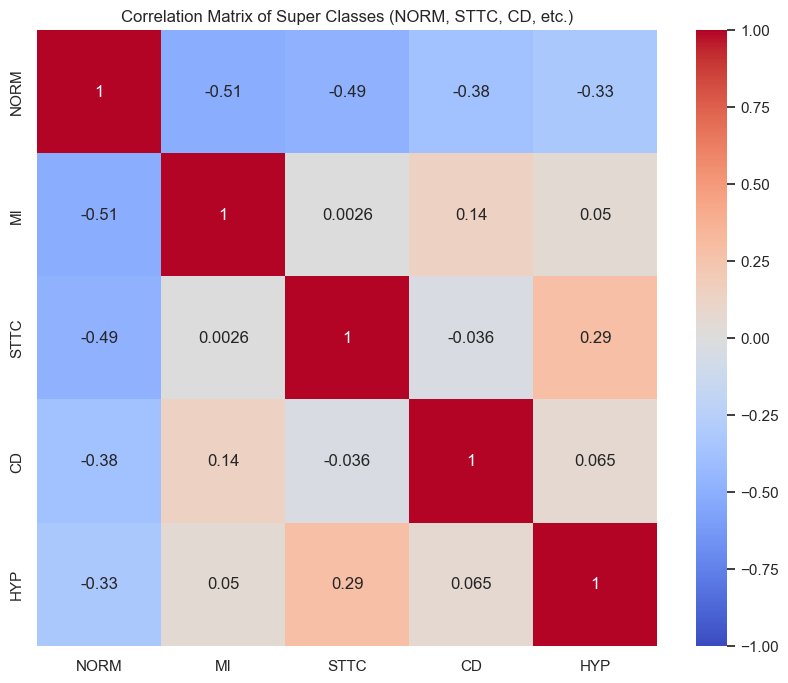

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 슈퍼 클래스 레이블 목록
label_columns = ['NORM', 'MI', 'STTC', 'CD', 'HYP']

# 해당 슈퍼 클래스들에 대한 데이터만 추출
correlation_data = final_data[label_columns]

# 상관 행렬 계산
correlation_matrix = correlation_data.corr()

# 상관 행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Super Classes (NORM, STTC, CD, etc.)')
plt.show()


In [9]:
print(final_data['NORM'].value_counts())
print(final_data['STTC'].value_counts())
print(final_data['MI'].value_counts())
print(final_data['HYP'].value_counts())
print(final_data['CD'].value_counts())

NORM
0    12285
1     9514
Name: count, dtype: int64
STTC
0    16691
1     5108
Name: count, dtype: int64
MI
0    16330
1     5469
Name: count, dtype: int64
HYP
0    19150
1     2649
Name: count, dtype: int64
CD
0    16901
1     4898
Name: count, dtype: int64


## raw_signal의 비선형성 확인

In [21]:
from ver5_journal.common.data.ECG_Data import ECG_Data
from torch.utils.data import DataLoader
import nolds
import numpy as np

# 전체 데이터를 한 번에 가져오도록 batch_size를 데이터 길이로 설정
total_data = ECG_Data(final_data)
data_loader = DataLoader(total_data, batch_size=32, shuffle=False)

# DataLoader에서 전체 데이터 가져오기 (하나의 배치로)
raw_signals, _ = next(iter(data_loader))  # 첫 번째 배치에서 전체 데이터 가져오기

# raw_signals를 2차원으로 변형 (샘플 수, 신호 길이)
raw_signals = raw_signals.view(raw_signals.size(0), -1).numpy().astype(np.float64)  # shape: (num_samples, signal_length)

print(f"Data type of raw_signals: {raw_signals.dtype}")
print(f"Shape of raw_signals: {raw_signals.shape}")
print(f"First signal sample type: {type(raw_signals[0])}, dtype: {raw_signals[0].dtype}")

Data type of raw_signals: float64
Shape of raw_signals: (32, 12000)
First signal sample type: <class 'numpy.ndarray'>, dtype: float64


In [24]:
import numpy as np

def shannon_entropy(signal, bins=10):
    """신호의 Shannon 엔트로피 계산"""
    hist, bin_edges = np.histogram(signal, bins=bins, density=True)
    hist = hist[hist > 0]  # 0을 제거하여 로그 계산 시 오류 방지
    return -np.sum(hist * np.log(hist))

import nolds

def approximate_entropy(signal, emb_dim=2):
    """신호의 Approximate Entropy 계산"""
    return nolds.sampen(signal, emb_dim=emb_dim)


def sample_entropy(signal, emb_dim=2):
    """신호의 Sample Entropy 계산"""
    return nolds.sampen(signal, emb_dim=emb_dim)


def hurst_exponent(signal):
    """신호의 Hurst 지수 계산"""
    return nolds.hurst_rs(signal)

def detrended_fluctuation_analysis(signal):
    """신호의 DFA 지수 계산"""
    return nolds.dfa(signal)


In [25]:
# 각 샘플에 대한 비선형 지표 계산
shannon_entropies = []
approx_entropies = []
sample_entropies = []
hurst_exponents = []
dfa_exponents = []

for idx, signal in enumerate(raw_signals):
    if np.isnan(signal).any() or np.isinf(signal).any():
        print(f"Sample index {idx} contains NaN or Inf values. Skipping.")
        continue

    try:
        shannon_entropies.append(shannon_entropy(signal))
        approx_entropies.append(approximate_entropy(signal))
        sample_entropies.append(sample_entropy(signal))
        hurst_exponents.append(hurst_exponent(signal))
        dfa_exponents.append(detrended_fluctuation_analysis(signal))
    except Exception as e:
        print(f"Error calculating nonlinear metric for sample index {idx}: {e}")


In [26]:
# 각 지표의 평균 계산
mean_shannon_entropy = np.nanmean(shannon_entropies)
mean_approx_entropy = np.nanmean(approx_entropies)
mean_sample_entropy = np.nanmean(sample_entropies)
mean_hurst_exponent = np.nanmean(hurst_exponents)
mean_dfa_exponent = np.nanmean(dfa_exponents)

print(f"Mean Shannon Entropy: {mean_shannon_entropy:.4f}")
print(f"Mean Approximate Entropy: {mean_approx_entropy:.4f}")
print(f"Mean Sample Entropy: {mean_sample_entropy:.4f}")
print(f"Mean Hurst Exponent: {mean_hurst_exponent:.4f}")
print(f"Mean DFA Exponent: {mean_dfa_exponent:.4f}")

Mean Shannon Entropy: -1.3743
Mean Approximate Entropy: 0.2984
Mean Sample Entropy: 0.2984
Mean Hurst Exponent: 0.5304
Mean DFA Exponent: 0.7908


In [13]:
ECG_train = final_data[final_data['strat_fold'].isin([1, 2, 3, 4, 5, 6, 7, 8])].reset_index(drop=True)
ECG_val = final_data[final_data['strat_fold'] == 9].reset_index(drop=True)
ECG_test = final_data[final_data['strat_fold'] == 10].reset_index(drop=True)

print(f'NORM: {ECG_train[ECG_train["NORM"] == 1].shape[0]}')
print(f'STTC: {ECG_train[ECG_train["STTC"] == 1].shape[0]}')
print(f'MI: {ECG_train[ECG_train["MI"] == 1].shape[0]}')
print(f'HYP: {ECG_train[ECG_train["HYP"] == 1].shape[0]}')
print(f'CD: {ECG_train[ECG_train["CD"] == 1].shape[0]}')


NORM: 7596
STTC: 4087
MI: 4379
HYP: 2119
CD: 3907


In [14]:

train_dataset = ECG_Data(ECG_train)
train_loader = DataLoader(train_dataset,batch_size=64, shuffle=True)
first_batch, label = next(iter(train_loader))

train_dataset.data

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,NORM,MI,STTC,CD,HYP
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,1,0,0,0,0
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,1,0,0,0,0
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,1,0,0,0,0
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,1,0,0,0,0
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17413,21832,7954.0,63.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-05-30 14:14:25,...,NaN,NaN,7,records100/21000/21832_lr,records500/21000/21832_hr,0,0,0,1,0
17414,21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,...,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr,0,0,1,0,0
17415,21834,20703.0,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,...,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr,1,0,0,0,0
17416,21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,...,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr,0,0,1,0,0


In [15]:
from ver5_journal.common.data.ECG_Data import ECG_Data

train_dataset = ECG_Data(ECG_train)
train_loader = DataLoader(train_dataset,batch_size=64, shuffle=True)

val_dataset=ECG_Data(ECG_val)
val_loader=DataLoader(val_dataset,batch_size=64, shuffle=True)

test_dataset=ECG_Data(ECG_test)
test_loader=DataLoader(test_dataset,batch_size=64, shuffle=True)

data, label = train_dataset[0] 

first_batch, label = next(iter(train_loader))

In [16]:
from ver5_journal.common.data.ECG_Data import ECG_Data

# ECG_train=ECG_train.reset_index()
# ECG_test=ECG_test.reset_index()

train_dataset = ECG_Data(ECG_train)
train_loader = DataLoader(train_dataset,batch_size=64, shuffle=True)

val_dataset=ECG_Data(ECG_val)
val_loader=DataLoader(val_dataset,batch_size=64, shuffle=True)

test_dataset=ECG_Data(ECG_test)
test_loader=DataLoader(test_dataset,batch_size=64, shuffle=True)

first_batch, label = next(iter(train_loader))

print(f"Batch shape: {first_batch.shape}")



"""
for i in range(12):
    print(f'channel {i}: {torch.min(first_batch[:, i])}, {torch.max(first_batch[:, i])}')
"""

Batch shape: torch.Size([64, 12, 1000])


"\nfor i in range(12):\n    print(f'channel {i}: {torch.min(first_batch[:, i])}, {torch.max(first_batch[:, i])}')\n"

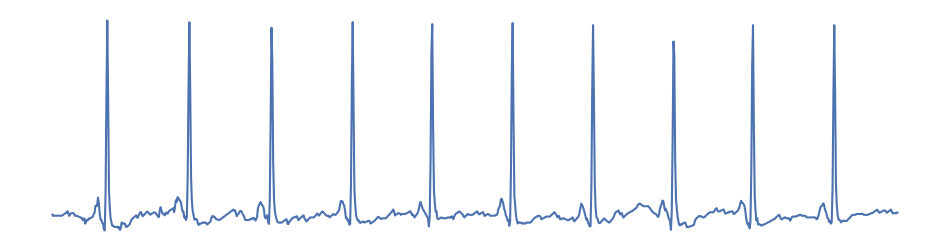

In [17]:
sample = first_batch[0]
plt.figure(figsize=(12,3))
plt.axis(False)
plt.plot(sample[1,:])

In [18]:
len(train_loader), len(val_loader), len(test_loader)

(273, 35, 35)